In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

In [21]:
def generating_func(x):
    #return np.random.normal(math.sin(x), err)
    return np.sin(x)

In [22]:
n_samples = 1000
np.random.seed(0)
x = np.linspace(0, 2*math.pi , n_samples)
y = generating_func(x)

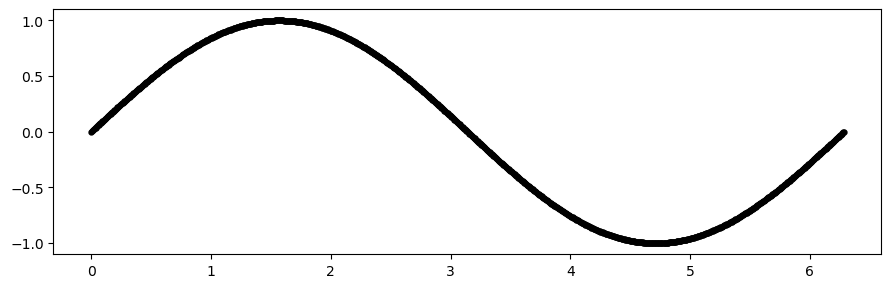

In [23]:
# draw the target function
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
plt.scatter(x, y, marker='.', c='k', s=50)
plt.show()

In [24]:
# training vs. testing data with different sizes
np.random.seed(math.ceil(10*np.random.rand()))
n_training_samples=2
idx=np.random.permutation(n_samples)
#training_data=10*np.random.rand()* np.linspace(0, 2*math.pi , n__training_samples)
training_data=x[idx[0:n_training_samples]]
training_targets = generating_func(training_data)
idx=np.random.permutation(n_samples)
testing_data=x[idx[0:2]]
testing_targets = generating_func(testing_data)

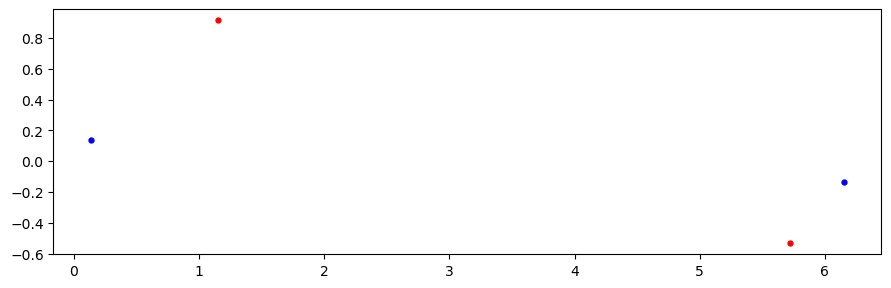

In [25]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
plt.scatter(training_data, training_targets, marker='.', c='b', s=50)
plt.scatter(testing_data, testing_targets, marker='.', c='r', s=50)
plt.show()

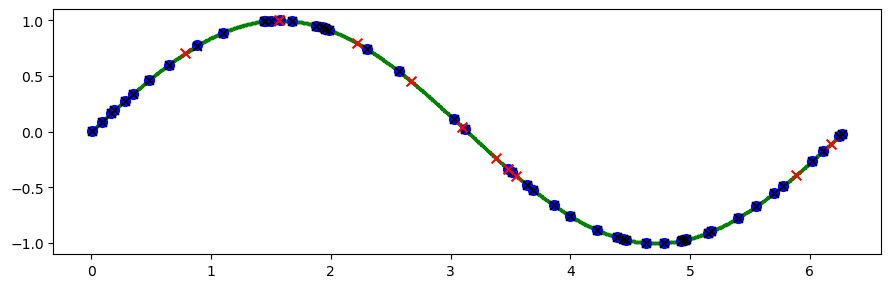

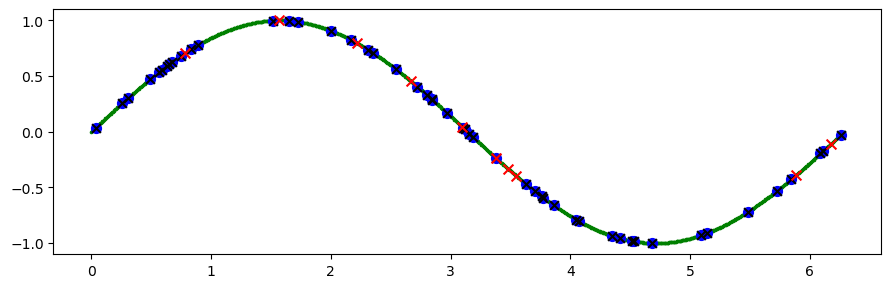

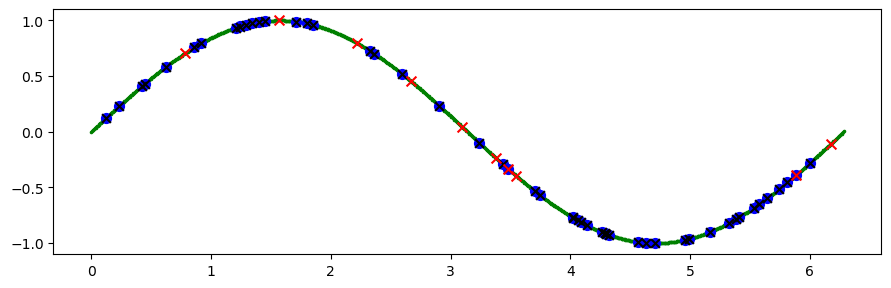

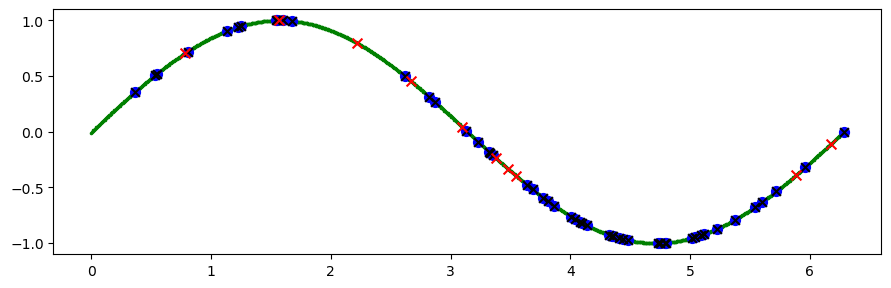

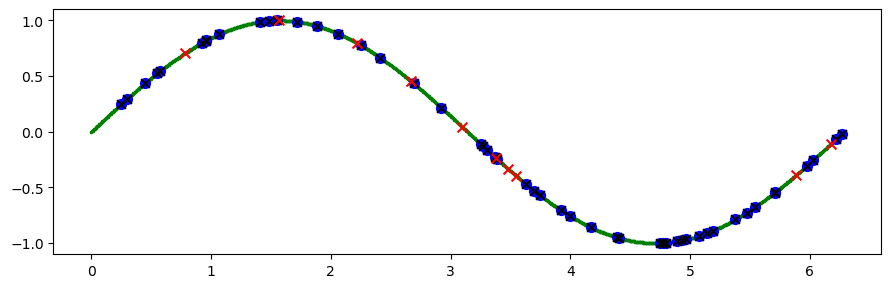

In [48]:
# average hypothese
degrees = [1, 2, 3,4,5, 8, 20] # complexity
n_training_samples=50
np.random.seed(100)
idx=np.random.permutation(n_samples)
testing_data=x[idx[0:10]]
testing_targets = generating_func(testing_data)
est=make_pipeline(PolynomialFeatures(degrees[5]), LinearRegression())
Ml_list=[]
no_hypotheses=5
MSE_training=np.zeros(no_hypotheses)
MSE_test=np.zeros(no_hypotheses)
for i in range(no_hypotheses):
    Ml_list.append(clone(est))
    np.random.seed(i)
    idx=np.random.permutation(n_samples)
    training_data=x[idx[0:n_training_samples]]
    training_targets = generating_func(training_data)
    Ml_list[i].fit(training_data[:, np.newaxis], training_targets)
    predicted_training=Ml_list[i].predict(training_data.reshape(-1,1))
    MSE_training[i]=np.sum(np.abs(training_targets-predicted_training))
    predicted_testing=Ml_list[i].predict(testing_data.reshape(-1,1))
    MSE_test[i]=np.sum(np.abs(testing_targets-predicted_testing))
    #ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')
    if no_hypotheses<10:
        fig = plt.figure(figsize=(9, 3.5))
        fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
        plt.scatter(x, Ml_list[i].predict(x[:, np.newaxis]), marker='.', c='g', s=10)
        plt.scatter(training_data, training_targets, marker='o', c='b', s=50)
        plt.scatter(training_data, predicted_training, marker='x', c='k', s=40)
        plt.scatter(testing_data, testing_targets, marker='x', c='r', s=50)
        plt.show()

In [49]:
print('E_in is ' + str(np.mean(MSE_training)))
print('E_out is ' + str(np.mean(MSE_test)))

E_in is 0.005373248849238925
E_out is 0.0014683044267984294


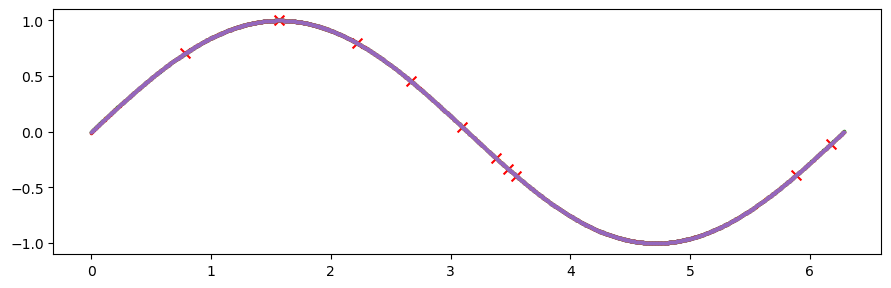

In [50]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
plt.scatter(testing_data, testing_targets, marker='x', c='r', s=50)
for j in range(no_hypotheses):
    plt.scatter(x, Ml_list[j].predict(x[:, np.newaxis]), marker='.', s=10)
plt.show()